In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pickle
import tikzplotlib
def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

In [17]:
def get_data(ep, num_qubits, num_meas, method, noise="None", prestr=""):
    basen=str(ep)+"_num_qubits"+str(num_qubits)+"_num_meas"+str(num_meas)+"_degree"+str(num_meas)+"_"
    basen+="num_reservoirs20_timeplex10_method"+str(method)+"_noise"+str(noise)+".pickle"
    name=prestr+"X_train"+basen
    with open(name,"rb") as f:
        X_train = pickle.load(f)
    
    name="X_test"+basen
    with open(name,"rb") as f:
        X_test = pickle.load(f)
    
    name="score"+basen
    with open(name,"rb") as f:
        score = pickle.load(f)
        
    name="prediction"+basen
    with open(name,"rb") as f:
        prediction = pickle.load(f)
        
    name="state"+basen
    with open(name,"rb") as f:
        state = pickle.load(f)
    return X_train, X_test, score, prediction, state, basen

In [4]:
# X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "classical", "None")
# _=plt.plot(state)

In [5]:
# X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "quantum_stab", "True")
# _=plt.plot(state)

In [6]:
# X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "quantum_stab", "True")
# _=plt.plot(state)

Plot convergence with training

(35, 140) (35,)
(167, 140) (167,)


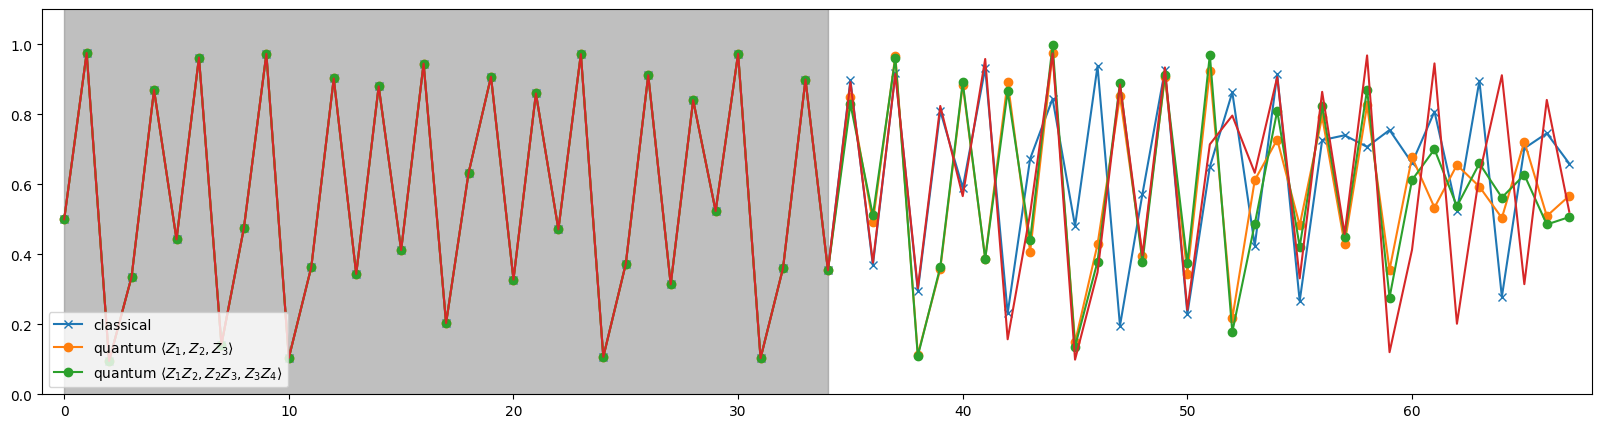

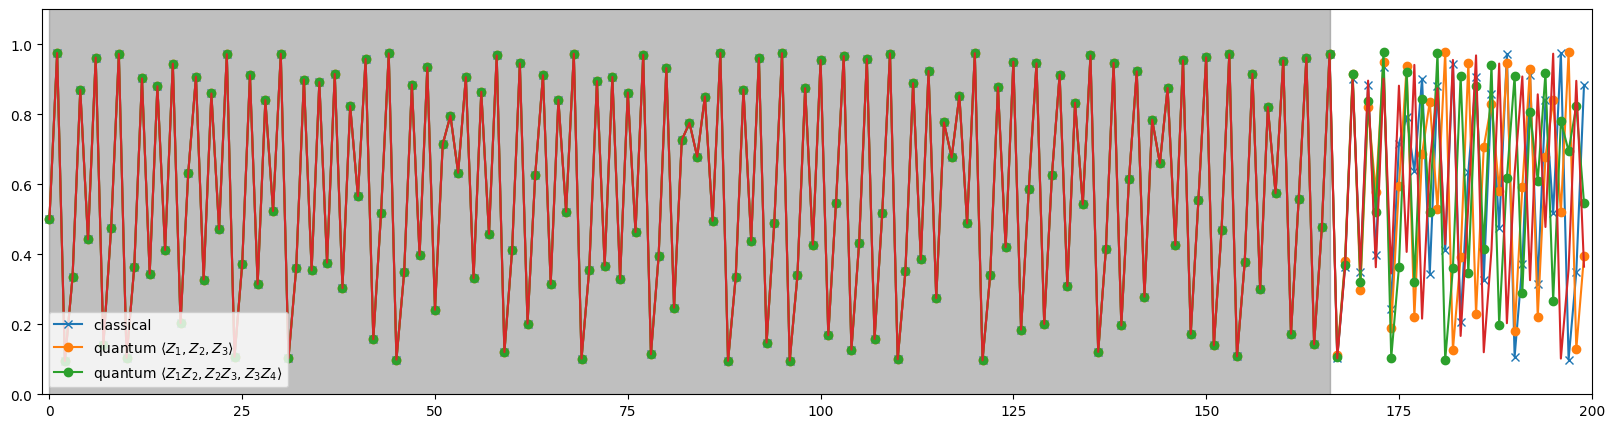

In [84]:

for ep in [0,4]:
    fig=plt.figure(figsize=(20,5))

    X_train, X_test, score, prediction, statec, basen = get_data(ep, 4, 3, "classical", "None")
    plt.plot(prediction, 'x-', label="classical")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_part", "True")
    plt.plot(prediction, 'o-', label=r"quantum $\langle Z_1, Z_2, Z_3\rangle$")
    print(state.shape,X_train.shape)
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
    plt.plot(prediction, 'o-', label=r"quantum $\langle Z_1Z_2, Z_2Z_3, Z_3Z_4\rangle$")
    
    # plt.plot(ts[15:prediction[ty].shape[0]],label='ground truth')
    plt.plot(np.concatenate([X_train,X_test]))
    plt.legend(loc="lower left")
    plt.ylim([-0,1.1])
    plt.xlim([-1,len(prediction)])
    plt.fill_between(range(len(X_train)), -2, 2, color='gray', alpha=0.5)
    
    # plt.show()
    fig=tikzplotlib_fix_ncols(fig)
    tikzplotlib.save("convergence_ep"+str(ep)+"_"+basen+".tex")

In [68]:
# fig=plt.figure(figsize=(20,5))

# ep=4

# X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "classical", "None")
# gt=np.concatenate([X_train,X_test])
# plt.plot((prediction-gt)**2, 'x-', label="classical")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
# plt.plot((prediction-gt)**2, 'o-', label="quantum part")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "None")
# plt.plot((prediction-gt)**2, 'o-', label="quantum stab")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "True")
# plt.plot((prediction-gt)**2, 'o-', label="quantum part, depolarizing")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "True")
# plt.plot((prediction-gt)**2, 'o-', label="quantum stab, depolarizing")

# # plt.plot(ts[15:prediction[ty].shape[0]],label='ground truth')
# plt.plot()
# plt.legend()
# plt.ylim([-0,1.1])
# plt.xlim([-1,len(prediction)])
# plt.fill_between(range(len(X_train)), -2, 2, color='gray', alpha=0.5)

# # plt.show()
# fig=tikzplotlib_fix_ncols(fig)
# tikzplotlib.save("comparison2_"+basen+".tex")

In [53]:
from reservoirpy.datasets import logistic_map
ts=logistic_map(1000, r=3.9, x0=0.5).flatten()

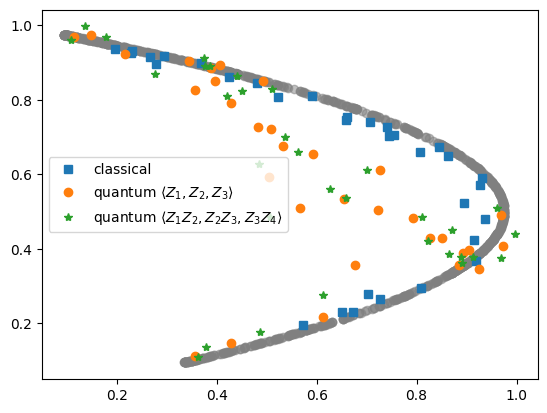

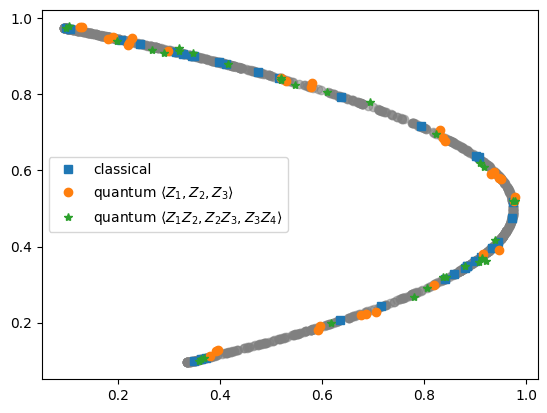

In [86]:
k=1

# for ep in range(5):
for ep in [0,4]:
    fig=plt.figure()
    
    plt.plot(ts[k:],ts[:-k],lw=0, color="gray", marker='o', alpha=.5)
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "classical", "None")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'s', label="classical")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_part", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"quantum $\langle Z_1, Z_2, Z_3\rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'*', label=r"quantum $\langle Z_1Z_2, Z_2Z_3, Z_3Z_4\rangle$")
    
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'o', color='lightgreen', label="quantum part, depolarizing")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'*', color="lightblue", label="quantum stab, depolarizing")
    
    
    # plt.ylim([0,1])
    # plt.xlim([0,1])
    plt.legend(loc='center left')
    
    fig=tikzplotlib_fix_ncols(fig)
    tikzplotlib.save("convergence2_ep"+str(ep)+"_"+basen+".tex")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
# tmp=prediction[len(X_train):]
# plt.plot(tmp[1:], tmp[:-1],'or')

Plot noise vs. noise free

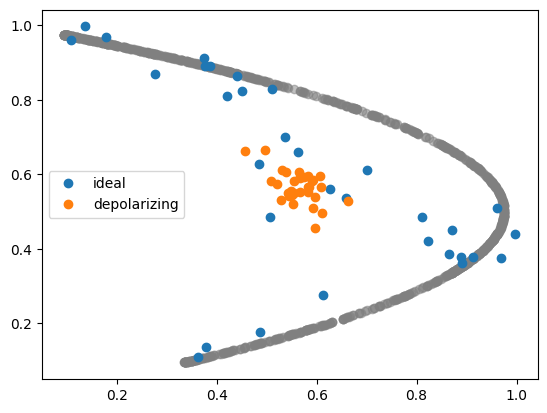

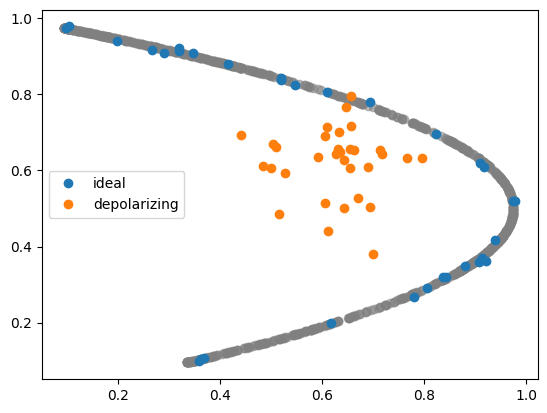

In [100]:
k=1

# for ep in range(5):
for ep in [0,4]:
    fig=plt.figure()
    
    plt.plot(ts[k:],ts[:-k],lw=0, color="gray", marker='o', alpha=.5)

    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label="ideal")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'*', label=r"quantum $\langle Z_1Z_2, Z_2Z_3, Z_3Z_4\rangle$")
    
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_part", "None")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'o', label="depolarizing")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "None")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label="depolarizing")
    
    
    # plt.ylim([0,1])
    # plt.xlim([0,1])
    plt.legend(loc='center left')
    
    fig=tikzplotlib_fix_ncols(fig)
    tikzplotlib.save("noise_ep"+str(ep)+"_"+basen+".tex")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
# tmp=prediction[len(X_train):]
# plt.plot(tmp[1:], tmp[:-1],'or')

Plot that it does not work without the correction step

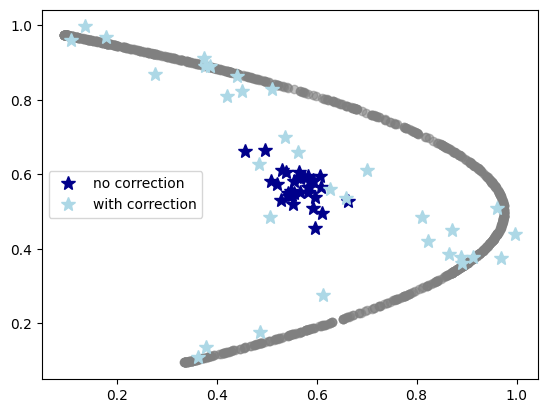

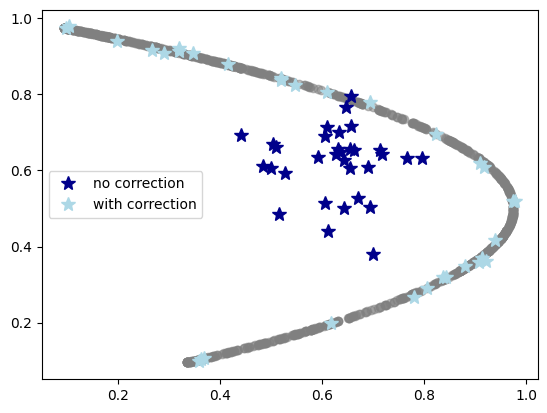

In [64]:
k=1

# for ep in range(5):
for ep in [0, 4]:
    fig=plt.figure()
    
    plt.plot(ts[k:],ts[:-k],lw=0, color="gray", marker='o', alpha=.5)
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "None", "nocorrect_")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'*', color="darkblue", label="no correction", markersize = 10)
    
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'*', color="lightblue", label="with correction", markersize = 10)
    
    
    # plt.ylim([0,1])
    # plt.xlim([0,1])
    plt.legend(loc='center left')
    
    fig=tikzplotlib_fix_ncols(fig)
    tikzplotlib.save("effect_of_correction_ep"+str(ep)+"_"+basen+".tex")

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
# tmp=prediction[len(X_train):]
# plt.plot(tmp[1:], tmp[:-1],'or')

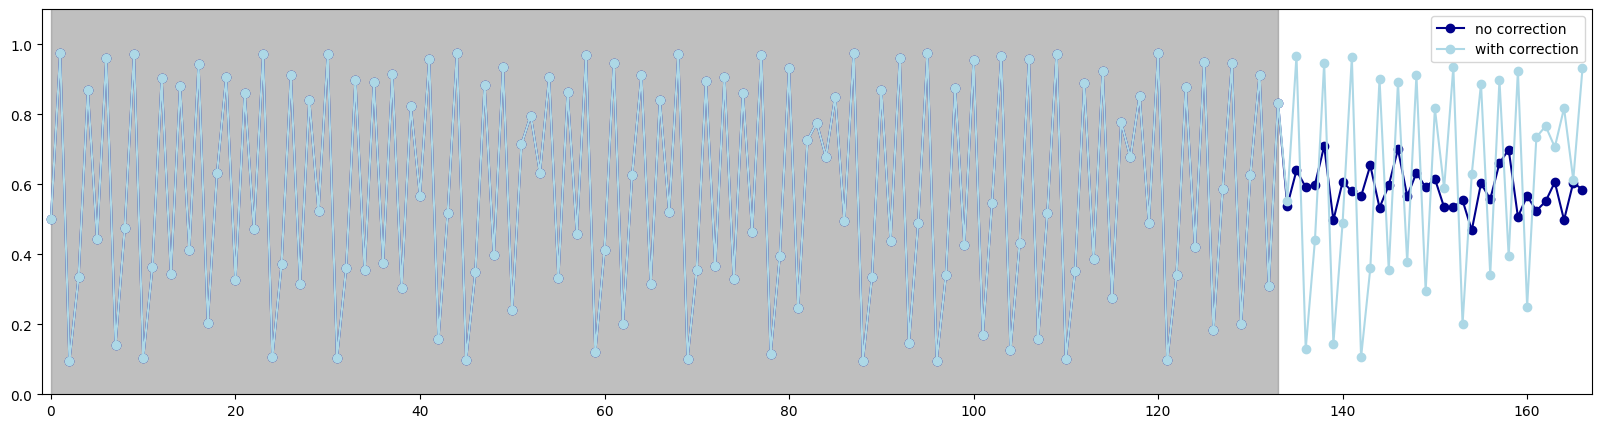

In [58]:
fig=plt.figure(figsize=(20,5))

ep=3

X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "None", "nocorrect_")
plt.plot(prediction, 'o-',color="darkblue", label="no correction")
  
    
X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
plt.plot(prediction, 'o-', color="lightblue", label="with correction")

# plt.plot(ts[15:prediction[ty].shape[0]],label='ground truth')
plt.plot()
plt.legend()
plt.ylim([-0,1.1])
plt.xlim([-1,len(prediction)])
plt.fill_between(range(len(X_train)), -2, 2, color='gray', alpha=0.5)

# plt.show()
fig=tikzplotlib_fix_ncols(fig)
tikzplotlib.save("effect_of_correction2_ep"+str(ep)+"_"+basen+".tex")

Different number of qubits and measurements

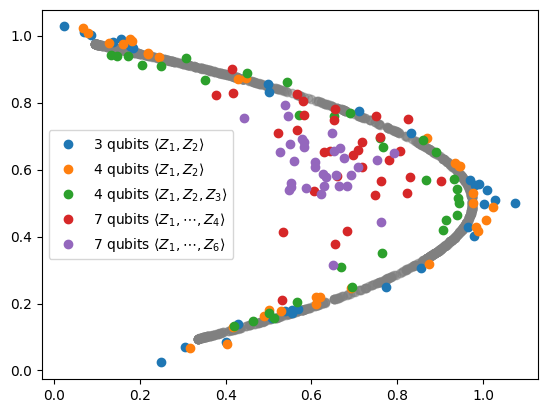

In [114]:
k=1

# for ep in range(5):
for ep in [2]:
    fig=plt.figure()
    
    plt.plot(ts[k:],ts[:-k],lw=0, color="gray", marker='o', alpha=.5)
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"3 qubits $\langle Z_1, Z_2\rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 2, "quantum_part", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"4 qubits $\langle Z_1, Z_2\rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_part", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"4 qubits $\langle Z_1, Z_2, Z_3\rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 4, "quantum_part", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"7 qubits $\langle Z_1, \cdots, Z_4 \rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "quantum_part", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"7 qubits $\langle Z_1, \cdots, Z_6 \rangle$")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'*', label=r"quantum $\langle Z_1Z_2, Z_2Z_3, Z_3Z_4\rangle$")
    
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'o', color='lightgreen', label="quantum part, depolarizing")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'*', color="lightblue", label="quantum stab, depolarizing")
    
    
    # plt.ylim([0,1])
    # plt.xlim([0,1])
    plt.legend(loc='center left')
    
    fig=tikzplotlib_fix_ncols(fig)
    tikzplotlib.save("comparison_numqubits_ep"+str(ep)+"_"+basen+".tex")
    break

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
# tmp=prediction[len(X_train):]
# plt.plot(tmp[1:], tmp[:-1],'or')

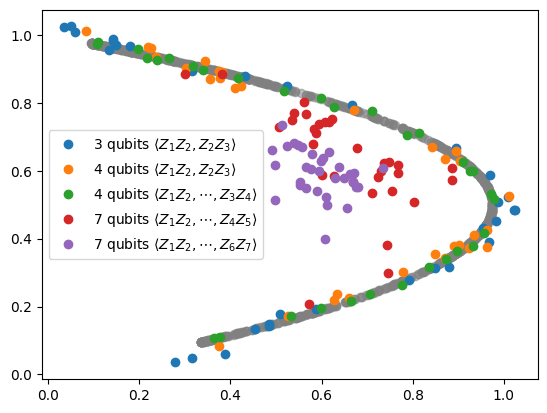

In [117]:
k=1

# for ep in range(5):
for ep in [2]:
    fig=plt.figure()
    
    plt.plot(ts[k:],ts[:-k],lw=0, color="gray", marker='o', alpha=.5)
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"3 qubits $\langle Z_1Z_2, Z_2Z_3\rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 2, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"4 qubits $\langle Z_1Z_2, Z_2Z_3\rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"4 qubits $\langle Z_1Z_2, \cdots, Z_3Z_4\rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 4, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"7 qubits $\langle Z_1Z_2, \cdots, Z_4Z_5 \rangle$")
    
    X_train, X_test, score, prediction, state, basen = get_data(ep, 7, 6, "quantum_stab", "True")
    tmp=prediction[len(X_train):]
    plt.plot(tmp[k:], tmp[:-k],'o', label=r"7 qubits $\langle Z_1Z_2, \cdots, Z_6Z_7 \rangle$")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 4, 3, "quantum_stab", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'*', label=r"quantum $\langle Z_1Z_2, Z_2Z_3, Z_3Z_4\rangle$")
    
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'o', color='lightgreen', label="quantum part, depolarizing")
    
    # X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_stab", "True")
    # tmp=prediction[len(X_train):]
    # plt.plot(tmp[k:], tmp[:-k],'*', color="lightblue", label="quantum stab, depolarizing")
    
    
    # plt.ylim([0,1])
    # plt.xlim([0,1])
    plt.legend(loc='center left')
    
    fig=tikzplotlib_fix_ncols(fig)
    tikzplotlib.save("comparison_numqubits_ep"+str(ep)+"_"+basen+".tex")
    break

# X_train, X_test, score, prediction, state, basen = get_data(ep, 3, 2, "quantum_part", "None")
# tmp=prediction[len(X_train):]
# plt.plot(tmp[1:], tmp[:-1],'or')

In [129]:
def limitrange(topology, dist=2):
    nh = []
    for tmp in topology:
        if abs(tmp[0]-tmp[1])<=2:
            nh.append(tmp)
    return nh

In [131]:
from itertools import combinations
h=list(combinations(range(7), 2))
nh=limitrange(h)
print(nh)
len(h), len(nh)

[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (4, 6), (5, 6)]


(21, 11)